# Titanic

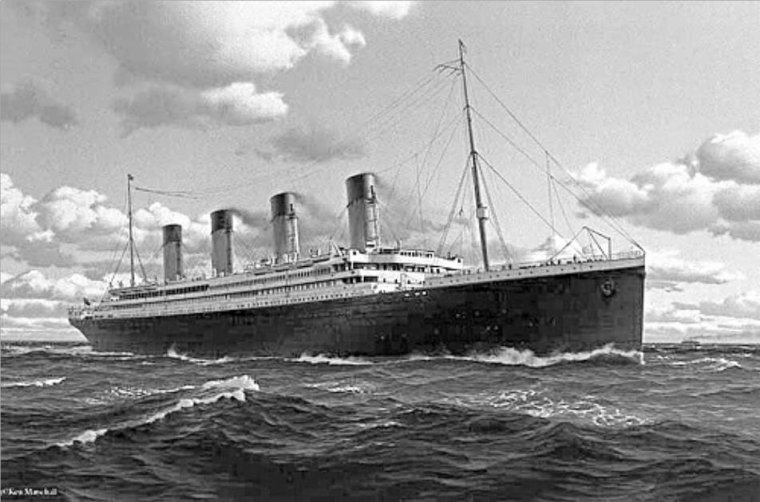

In [3]:
from IPython.core.display import Image, display
display(Image('http://animatedgifs.a.n.pic.centerblog.net/o/f0dd6638.jpg', width=400))

Dans cet exercice, vous devez utiliser un arbre de décision pour prédire le sort des passagers du Titanic en fonction de différentes caractéristiques (age, classe d'embarquement, avec ou sans famille à bord, ...)
1. Assurez vous que le dataset ne contient pas de valeurs manquantes. Combien de passagers ont survécu ? Quel était leur age moyen ? Et celui des victimes ? (on pourra examiner le 2D numpy tableau data_titanic.values) 
2. Transformer les variables catégorielles quand cela est pertinent. 
3. Construire le classifieur et produire le visuel de l'arbre obtenu. 
4. Etudier l'impact sur la performance de la profondeur max et tester au moins un autre paramètre du constructeur de DTClassifier. Choisir les paramètres adéquats. Justifier. 
5. Produire un graphique en baton qui montre la répartition homme/femme dans les 2 classes (mort ou non). Idem pour l'age (reprendre le code à la fin du TP numpyV2)
6. Conclure sur la pertinence des arbres de décision pour cette étude data. 
7. Reproduire cette étude sur un dataset de votre choix : ftp://ftp.ics.uci.edu/pub/machine-learning-databases/


In [4]:
import pandas as pd
import numpy as np

In [5]:
titanic_data = pd.read_csv("http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")

In [6]:
titanic_data.head( 3 )

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250


In [7]:
titanic_data.shape

(887, 8)

In [8]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [9]:
titanic_data.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [10]:
titanic_data.info ## Toute la table
titanic_data.info() ## Juste le résumé

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.5+ KB


## Question 1

Assurez vous que le dataset ne contient pas de valeurs manquantes. Combien de passagers ont survécu ? Quel était leur age moyen ? Et celui des victimes ? (on pourra examiner le 2D numpy tableau data_titanic.values) 

In [11]:
survived = 0
dead = 0
age = []
age2 = []
for i in titanic_data.values:
    if i[0] == 1:
        survived += 1
        age.append(i[4])
    else:
        dead += 1
        age2.append(i[4])
        
print("Nombre de survivants: ", survived)
print("Age moyen des survivants: ", np.average(age), "ans.")
print("Nombre de morts: ", dead)
print("Age moyen des victimes: ", np.average(age2), "ans.")

Nombre de survivants:  342
Age moyen des survivants:  28.4083918129 ans.
Nombre de morts:  545
Age moyen des victimes:  30.1385321101 ans.


In [12]:
from collections import Counter
Counter(titanic_data['Survived'])

Counter({0: 545, 1: 342})

## Question 2

Transformer les variables catégorielles quand cela est pertinent. 

In [13]:
titanic = pd.get_dummies(titanic_data, columns=["Sex"])
titanic = titanic.drop('Name', axis=1)

## Question 3

Construire le classifieur et produire le visuel de l'arbre obtenu.

In [14]:
import random
def data_split(x, y, prob):
        train,test=[],[]
        d=zip(x,y)
        for line in d:
            if(random.random()<prob):
                train.append(line)
            else :
                test.append(line)
        
        x_train,y_train=list(zip(*train))
        x_test,y_test=list(zip(*test))
        return x_train,y_train, x_test,y_test

def accuracy(y_pred,y) : 
    return (sum(y_pred == y))/len(y)

In [15]:
from sklearn.tree import DecisionTreeClassifier

x = titanic.drop('Survived',axis=1) # Sans les survivants
y = titanic_data["Survived"] # Que les survivants

x_train, y_train, x_test, y_test = data_split(x.values, y, .5)

clf = DecisionTreeClassifier().fit(x_train, y_train)

y_pred = clf.predict(x_test)
print(accuracy(y_pred, y_test))

0.76404494382


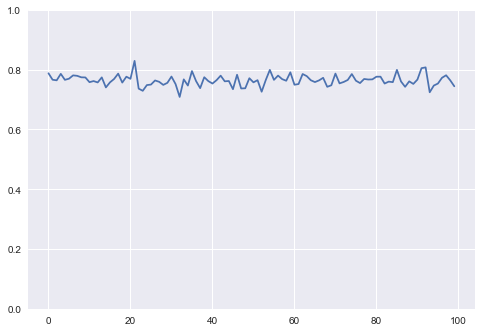

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np

res=[]

for i in range(100):
    x_train,y_train, x_test,y_test=data_split(x.values, y, .5)
    clf = DecisionTreeClassifier().fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    res.append(accuracy(y_pred,y_test))
    
res

plt.ylim([0,1])
plt.plot(res);

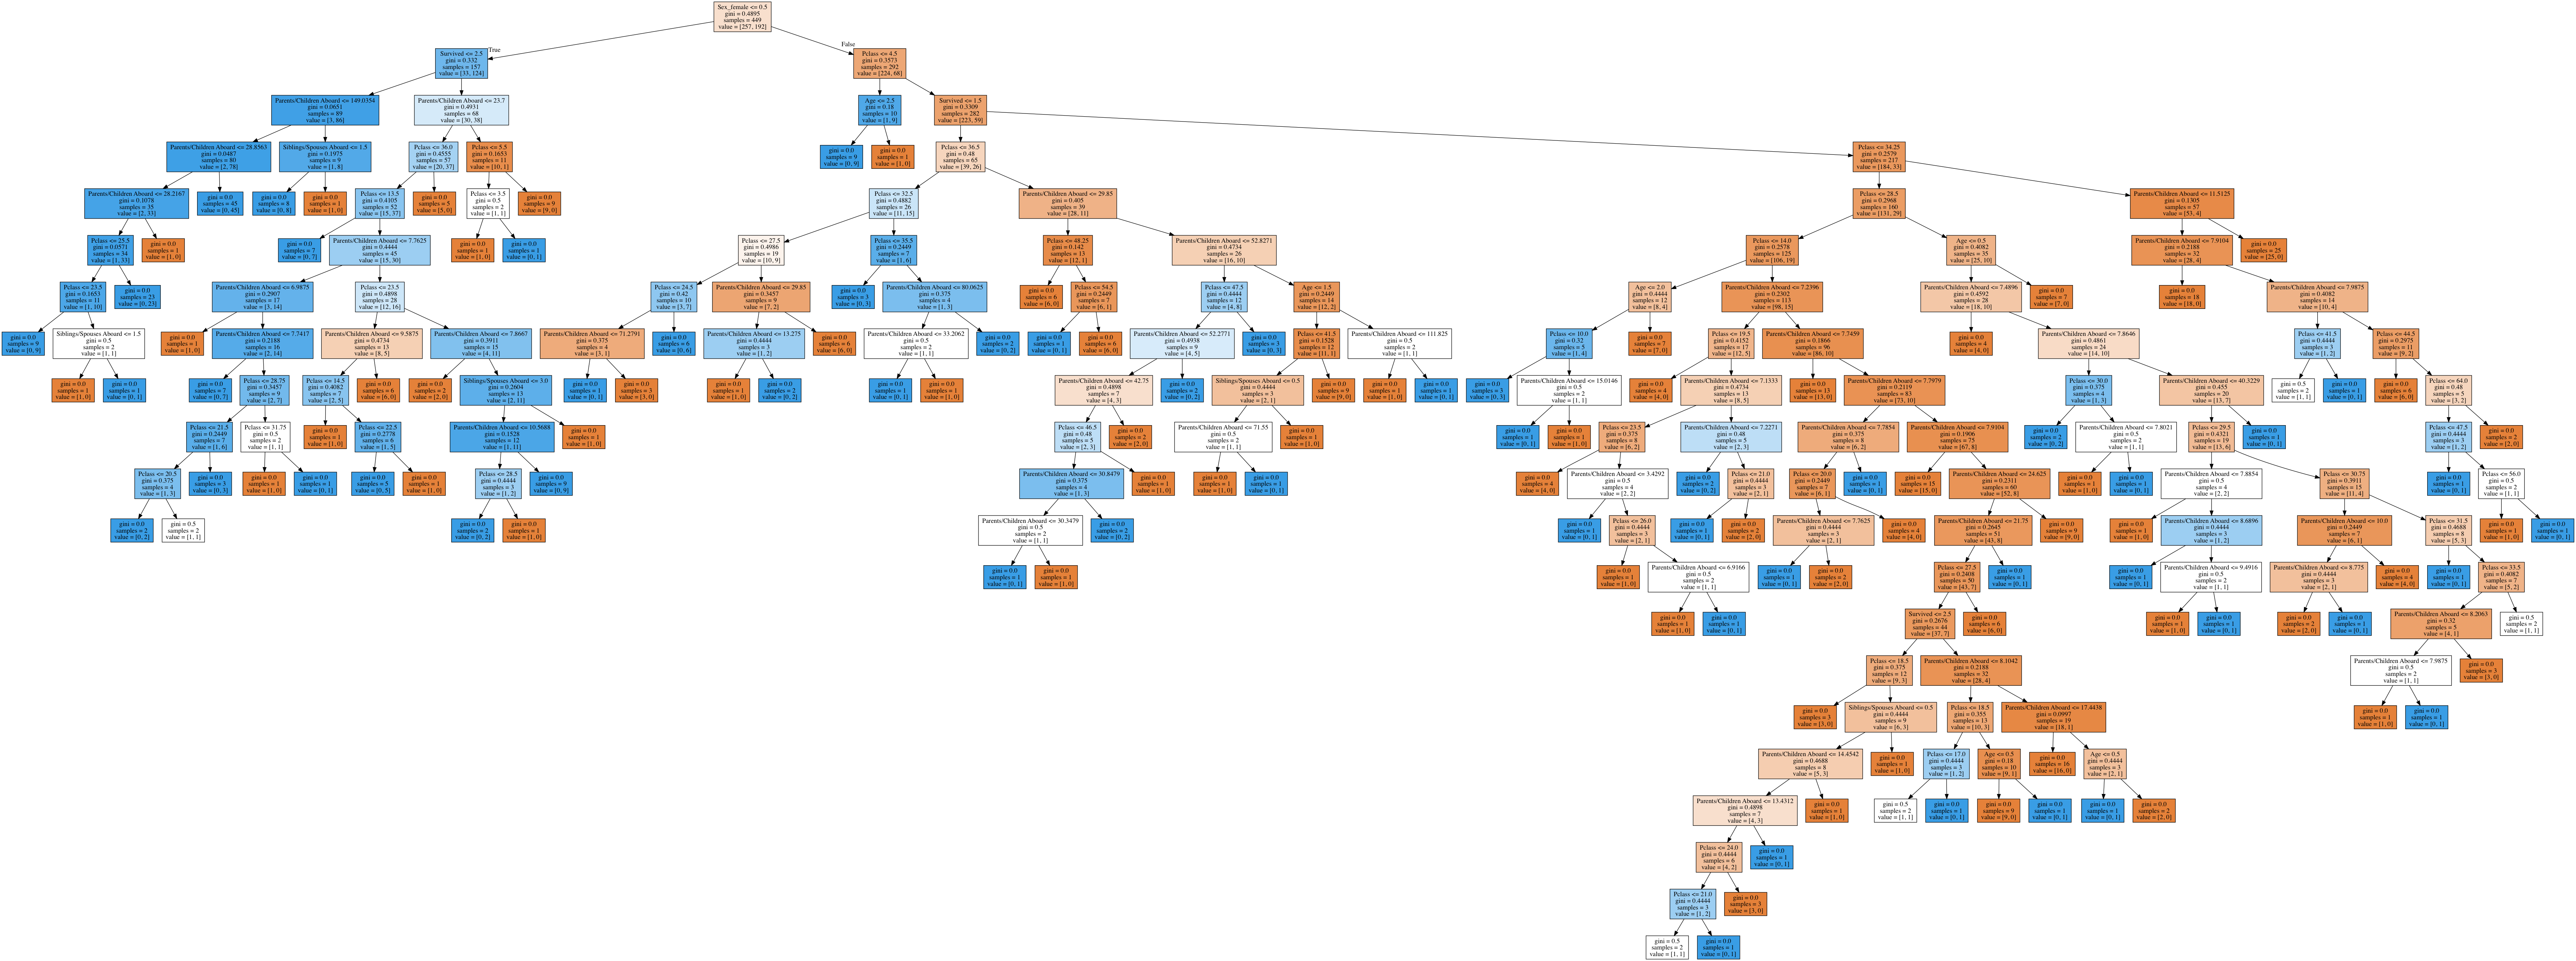

In [17]:
from sklearn.tree import export_graphviz

with open("tree.dot", 'w') as f:
        export_graphviz(clf, out_file=f,
                        feature_names=titanic.columns,
                        filled=True)
!dot -Tpng tree.dot -o tree.png 
display(Image('tree.png'))

## Question 4

Etudier l'impact sur la performance de la profondeur max et tester au moins un autre paramètre du constructeur de DTClassifier. Choisir les paramètres adéquats. Justifier. 

In [18]:
def calculAccuracy(maxd):
    res=[]
    for i in range(100):
        x_train,y_train, x_test,y_test=data_split(x.values, y, .5)
        clf = DecisionTreeClassifier(max_depth=maxd).fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        res.append(accuracy(y_pred,y_test))
    return np.average(res)

def calculAccuracyTRAIN(maxd):
    res=[]
    for i in range(100):
        x_train,y_train, x_test,y_test=data_split(x.values, y, .5)
        clf = DecisionTreeClassifier(max_depth=maxd).fit(x_train,y_train)
        y_pred=clf.predict(x_train)
        res.append(accuracy(y_pred,y_train))
    return np.average(res)

def calculAccuracyWithMinSampleSplit(maxd, minSampleSplit):
    res=[]
    for i in range(100):
        x_train,y_train, x_test,y_test=data_split(x.values, y, .5)
        clf = DecisionTreeClassifier(max_depth=maxd, min_samples_split=minSampleSplit).fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        res.append(accuracy(y_pred,y_test))
    return np.average(res)

def calculAccuracyTRAINWithMinSampleSplit(maxd, minSampleSplit):
    res=[]
    for i in range(100):
        x_train,y_train, x_test,y_test=data_split(x.values, y, .5)
        clf = DecisionTreeClassifier(max_depth=maxd, min_samples_split=minSampleSplit).fit(x_train,y_train)
        y_pred=clf.predict(x_train)
        res.append(accuracy(y_pred,y_train))
    return np.average(res)

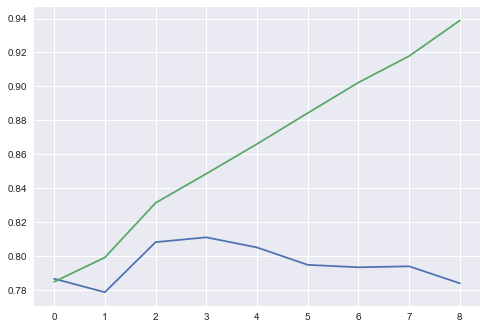

In [19]:
score=[]
scoreTRAIN=[]
for maxd in range(1,10):
        score.append(calculAccuracy(maxd))
        scoreTRAIN.append(calculAccuracyTRAIN(maxd))
plt.plot(score);
plt.plot(scoreTRAIN);

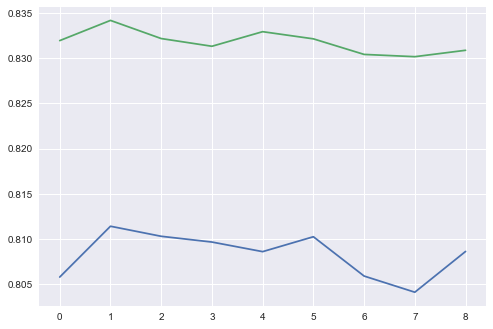

In [20]:
score=[]
scoreTRAIN=[]
for i in range(2,11):
        score.append(calculAccuracyWithMinSampleSplit(3, i))
        scoreTRAIN.append(calculAccuracyTRAINWithMinSampleSplit(3, i))
plt.plot(score);
plt.plot(scoreTRAIN);

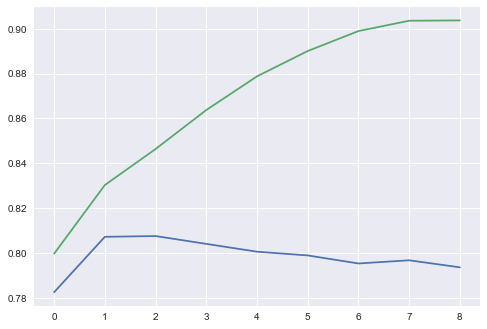

In [21]:
score=[]
scoreTRAIN=[]
for i in range(2,11):
        score.append(calculAccuracyWithMinSampleSplit(i, i))
        scoreTRAIN.append(calculAccuracyTRAINWithMinSampleSplit(i, i))
plt.plot(score);
plt.plot(scoreTRAIN);

## Question 5

Produire un graphique en baton qui montre la répartition homme/femme dans les 2 classes (mort ou non). Idem pour l'age (reprendre le code à la fin du TP numpyV2)

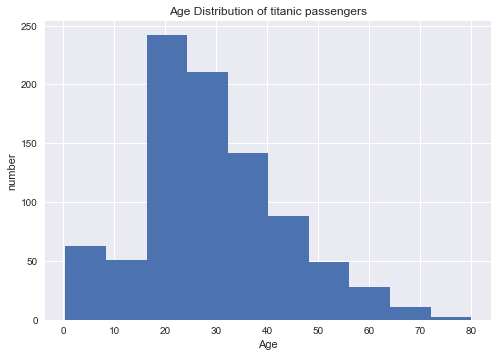

In [22]:
plt.hist(titanic["Age"])
plt.title('Age Distribution of titanic passengers')
plt.xlabel('Age')
plt.ylabel('number');

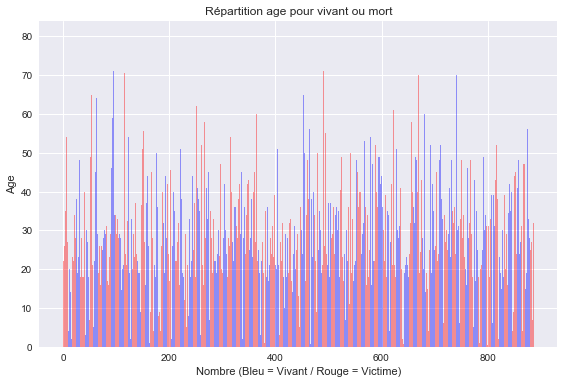

In [23]:
fig, ax = plt.subplots()

index = np.arange(len(titanic["Age"]))
bar_width = 0.5

opacity = 0.4
error_config = {'ecolor': '0.3'}
r1 = ax.bar(index, titanic["Age"], bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config)

r2 = ax.bar(index + bar_width, titanic["Age"], bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config)

plt.xlabel('Nombre (Bleu = Vivant / Rouge = Victime)')
plt.ylabel('Age')
plt.title('Répartition age pour vivant ou mort')

plt.tight_layout()
plt.show()

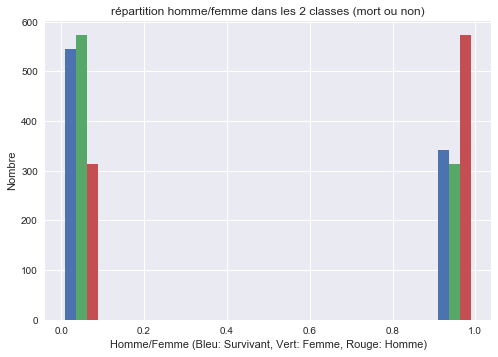

In [34]:
hf = titanic.drop('Pclass', axis=1).drop('Age', axis=1).drop('Siblings/Spouses Aboard', axis=1)
hf = hf.drop('Parents/Children Aboard', axis=1).drop('Fare', axis=1)

plt.hist(hf6.values)
plt.title('répartition homme/femme dans les 2 classes (mort ou non)')
plt.xlabel('Homme/Femme (Bleu: Survivant, Vert: Femme, Rouge: Homme)')
plt.ylabel('Nombre')

## Question 6

Conclure sur la pertinence des arbres de décision pour cette étude data. 

## Question 7

Reproduire cette étude sur un dataset de votre choix : ftp://ftp.ics.uci.edu/pub/machine-learning-databases/